In [2]:
#Useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [3]:
import pandas as pd 
data= pd.read_csv('Washington_State_HDMA-2016.csv')
data.head()

C:\Users\jyoti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (23,24,25,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [4]:
data.isnull().sum()   # to check number of nan values

tract_to_msamd_income                615
rate_spread                       457928
population                           610
minority_population                  610
number_of_owner_occupied_units       622
number_of_1_to_4_family_units        611
loan_amount_000s                       0
hud_median_family_income             606
applicant_income_000s              62033
state_name                             0
state_abbr                             0
sequence_number                        0
respondent_id                          0
purchaser_type_name                    0
property_type_name                     0
preapproval_name                       0
owner_occupancy_name                   0
msamd_name                         38274
loan_type_name                         0
loan_purpose_name                      0
lien_status_name                       0
hoepa_status_name                      0
edit_status_name                  392061
denial_reason_name_3              465320
denial_reason_na

In [5]:
loan = data[['tract_to_msamd_income','population','hoepa_status_name', 'loan_amount_000s','hud_median_family_income','sequence_number','property_type_name','owner_occupancy_name','lien_status_name','county_name','as_of_year','application_date_indicator','applicant_sex_name','applicant_race_name_1','applicant_ethnicity_name','agency_name','agency_abbr','action_taken_name','loan_purpose_name']]
loan.head()
#selected columns required for analysis

,tract_to_msamd_income,population,hoepa_status_name,loan_amount_000s,hud_median_family_income,sequence_number,property_type_name,owner_occupancy_name,lien_status_name,county_name,as_of_year,application_date_indicator,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name,loan_purpose_name
0,121.690002,8381.0,Not a HOEPA loan,227,73300.0,119969,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Clark County,2016,0,Female,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated,Refinancing
1,83.370003,4915.0,Not a HOEPA loan,240,57900.0,52605,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Walla Walla County,2016,0,Male,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,Home purchase
2,91.129997,5075.0,Not a HOEPA loan,241,73300.0,6210,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Clark County,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,Refinancing
3,146.169998,5032.0,Not a HOEPA loan,351,73300.0,197,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Clark County,2016,0,Male,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated,Refinancing
4,162.470001,5183.0,Not a HOEPA loan,417,78100.0,32582,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Kitsap County,2016,0,Female,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated,Home improvement


In [7]:
filtered_loan = loan.dropna(how='any')
filtered_loan.isnull().sum()

tract_to_msamd_income         0
population                    0
hoepa_status_name             0
loan_amount_000s              0
hud_median_family_income      0
sequence_number               0
property_type_name            0
owner_occupancy_name          0
lien_status_name              0
county_name                   0
as_of_year                    0
application_date_indicator    0
applicant_sex_name            0
applicant_race_name_1         0
applicant_ethnicity_name      0
agency_name                   0
agency_abbr                   0
action_taken_name             0
loan_purpose_name             0
dtype: int64

In [8]:
filtered_loan['approvedornot'] = filtered_loan['action_taken_name'].apply(lambda x:'Loan approved' if x == 'Loan originated' else 'Not approved')

filtered_loan.head()

C:\Users\jyoti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tract_to_msamd_income,population,hoepa_status_name,loan_amount_000s,hud_median_family_income,sequence_number,property_type_name,owner_occupancy_name,lien_status_name,county_name,as_of_year,application_date_indicator,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name,loan_purpose_name,approvedornot
0,121.690002,8381.0,Not a HOEPA loan,227,73300.0,119969,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Clark County,2016,0,Female,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated,Refinancing,Loan approved
1,83.370003,4915.0,Not a HOEPA loan,240,57900.0,52605,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Walla Walla County,2016,0,Male,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,Home purchase,Loan approved
2,91.129997,5075.0,Not a HOEPA loan,241,73300.0,6210,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Clark County,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,Refinancing,Loan approved
3,146.169998,5032.0,Not a HOEPA loan,351,73300.0,197,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Clark County,2016,0,Male,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated,Refinancing,Loan approved
4,162.470001,5183.0,Not a HOEPA loan,417,78100.0,32582,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Kitsap County,2016,0,Female,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated,Home improvement,Loan approved


In [10]:
Loan_pur = filtered_loan.groupby(['loan_purpose_name','approvedornot']).size().reset_index()
Loan_pur.head()

,loan_purpose_name,approvedornot,0
0,Home improvement,Loan approved,13925
1,Home improvement,Not approved,9892
2,Home purchase,Loan approved,122640
3,Home purchase,Not approved,69619
4,Refinancing,Loan approved,127085


In [11]:
list1= ['Home improvement', 'Home purchase' , 'Refinancing']
list1

['Home improvement', 'Home purchase', 'Refinancing']

In [136]:
for i in list1:
    #temp = 0
    if(i == 'Home improvement'):
        val = Loan_pur[Loan_pur['loan_purpose_name']==i][0].sum()
        print(val)
        Loan_pur.loc[Loan_pur['loan_purpose_name']==i,'total'] = val
    if(i == 'Home purchase'):
        temp = Loan_pur[Loan_pur['loan_purpose_name']==i][0].sum()
        print(temp)
        Loan_pur.loc[Loan_pur['loan_purpose_name']==i,'total'] = temp
    if(i == 'Refinancing'):
        value = Loan_pur[Loan_pur['loan_purpose_name']==i][0].sum()
        print(value)
        Loan_pur.loc[Loan_pur['loan_purpose_name']==i,'total'] = value
Loan_pur
#Loan_pur1 =Loan_pur.drop(['totalHP','totalRF','totalHI'], axis =1)
#k = Loan_pur1.drop(['Home improvement'], axis =0)
g= Loan_pur.rename(columns= {0: 'value', 'approvedornot': 'Action taken in percentage'})
g['percent']= g['value']/g['total']

g['percent'] *=100
g

23817
192259
249875


,loan_purpose_name,Action taken in percentage,value,total,percent
0,Home improvement,Loan approved,13925,23817.0,58.466641
1,Home improvement,Not approved,9892,23817.0,41.533359
2,Home purchase,Loan approved,122640,192259.0,63.788951
3,Home purchase,Not approved,69619,192259.0,36.211049
4,Refinancing,Loan approved,127085,249875.0,50.859430
5,Refinancing,Not approved,122790,249875.0,49.140570


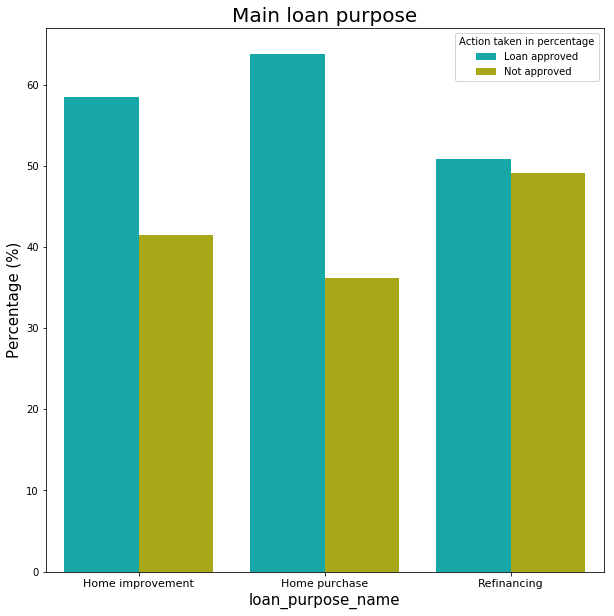

In [137]:
#plt.rcParams['axes.prop_cycle'] = ("cycler('color', 'cg')")
ax1 = sns.barplot(x='loan_purpose_name', y= 'percent', data=g, hue ='Action taken in percentage' )

plt.xticks(fontsize=11)
plt.xlabel("loan_purpose_name" ,fontsize=15)
plt.ylabel("Percentage (%)",fontsize=15)
plt.title("Main loan purpose",fontsize=20)
plt.rcParams['figure.figsize']=(7,7)
plt.rcParams['axes.prop_cycle'] = ("cycler('color', 'gr')")

C:\Users\jyoti\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


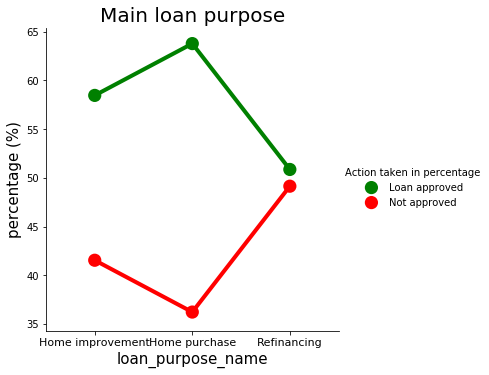

In [138]:
sns.factorplot(x='loan_purpose_name', y= 'percent', data=g, hue ='Action taken in percentage' , style ='Approved_or_NotApproved_in_Percent',scale = 1.5)
plt.xticks(fontsize=11)
plt.xlabel("loan_purpose_name" ,fontsize=15)
plt.ylabel("percentage (%)",fontsize=15)
plt.title("Main loan purpose",fontsize=20)
plt.rcParams['figure.figsize']=(10,10)



In [ ]:

# Approved or not approved for property type 


In [16]:
#for property 
proper =  filtered_loan[['property_type_name','approvedornot']]
#proper.head()
propert_app =proper.groupby(["property_type_name","approvedornot" ]).size().reset_index()
propert_app

,property_type_name,approvedornot,0
0,Manufactured housing,Loan approved,7141
1,Manufactured housing,Not approved,7283
2,Multifamily dwelling,Loan approved,1221
3,Multifamily dwelling,Not approved,417
4,One-to-four family dwelling (other than manufa...,Loan approved,255288
5,One-to-four family dwelling (other than manufa...,Not approved,194601


In [42]:
list2 =['Manufactured housing', 'Multifamily dwelling', 'One-to-four family dwelling (other than manufactured housing)']

In [78]:
for i in list:
    #temp = 0
    if(i == 'Manufactured housing'):
        val = propert_app[propert_app['property_type_name']==i][0].sum()
        print(val)
        propert_app.loc[propert_app['property_type_name']==i,'total'] = val
        
    if(i == 'Multifamily dwelling'):
        temp = propert_app[propert_app['property_type_name']==i][0].sum()
        print(temp)
        propert_app.loc[propert_app['property_type_name']==i,'total'] = temp
        
    if(i == 'One-to-four family dwelling (other than manufactured housing)'):
        value = propert_app[propert_app['property_type_name']==i][0].sum()
        print(value)
        propert_app.loc[propert_app['property_type_name']==i,'total'] = value
        
propert_app

gg= propert_app.rename(columns= {0: 'value', 'approvedornot': 'Action taken in percentage'})
gg['percent']= gg['value']/gg['total']

gg['percent'] *=100

gg['property_type_name'] = gg['property_type_name'].replace({'One-to-four family dwelling (other than manufactured housing)':'One-to-four family dwelling'
})
gg


14424
1638
449889


,property_type_name,Action taken in percentage,value,total,percent
0,Manufactured housing,Loan approved,7141,14424.0,49.507765
1,Manufactured housing,Not approved,7283,14424.0,50.492235
2,Multifamily dwelling,Loan approved,1221,1638.0,74.542125
3,Multifamily dwelling,Not approved,417,1638.0,25.457875
4,One-to-four family dwelling,Loan approved,255288,449889.0,56.744664
5,One-to-four family dwelling,Not approved,194601,449889.0,43.255336


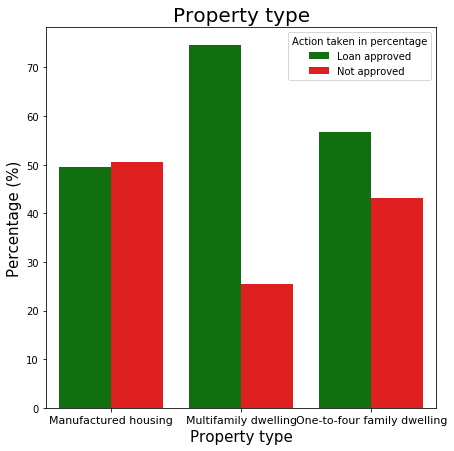

In [147]:
#plt.rcParams['axes.prop_cycle'] = ("cycler('color', 'cg')")
ax1 = sns.barplot(x='property_type_name', y= 'percent', data=gg, hue ='Action taken in percentage' )

plt.xticks(fontsize=11)
plt.xlabel("Property type" ,fontsize=15)
plt.ylabel("Percentage (%)",fontsize=15)
plt.title("Property type",fontsize=20)
plt.rcParams['figure.figsize']=(7,7)
plt.rcParams['axes.prop_cycle'] = ("cycler('color', 'gr')")

C:\Users\jyoti\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

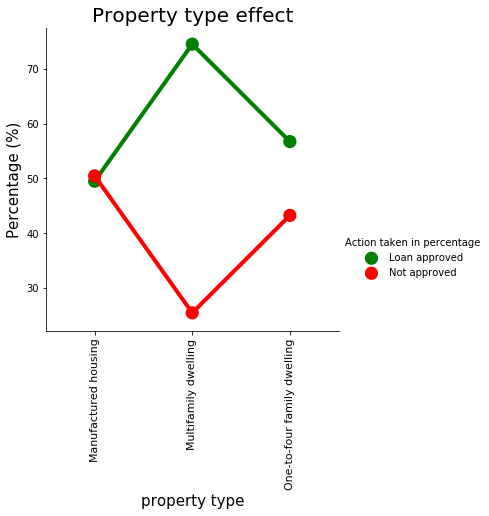

In [145]:
sns.factorplot(x='property_type_name', y= 'percent', data=gg, hue ='Action taken in percentage' , style ='Approved_or_NotApproved_in_Percent',scale = 1.5)
plt.xticks(fontsize=11)
plt.xlabel("property type" ,fontsize=15)
plt.ylabel("Percentage (%)",fontsize=15)
plt.title("Property type effect",fontsize=20)
plt.rcParams['figure.figsize']=(10,10)
plt.xticks(rotation=90)


In [29]:
#
# for gender
filtered_loan.head()

,tract_to_msamd_income,population,loan_amount_000s,hud_median_family_income,sequence_number,property_type_name,owner_occupancy_name,lien_status_name,county_name,as_of_year,application_date_indicator,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name,loan_purpose_name,approvedornot
0,121.690002,8381.0,227,73300.0,119969,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Clark County,2016,0,Female,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated,Refinancing,Loan approved
1,83.370003,4915.0,240,57900.0,52605,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Walla Walla County,2016,0,Male,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,Home purchase,Loan approved
2,91.129997,5075.0,241,73300.0,6210,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Clark County,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,Refinancing,Loan approved
3,146.169998,5032.0,351,73300.0,197,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Clark County,2016,0,Male,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated,Refinancing,Loan approved
4,162.470001,5183.0,417,78100.0,32582,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Secured by a first lien,Kitsap County,2016,0,Female,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated,Home improvement,Loan approved


In [52]:
#for property 
gender =  filtered_loan[['applicant_sex_name','approvedornot']]
#proper.head()
gender_app =filtered_loan.groupby(["applicant_sex_name","approvedornot" ]).size().reset_index()
gender_app

,applicant_sex_name,approvedornot,0
0,Female,Loan approved,65571
1,Female,Not approved,44439
2,"Information not provided by applicant in mail,...",Loan approved,22430
3,"Information not provided by applicant in mail,...",Not approved,16846
4,Male,Loan approved,172613
5,Male,Not approved,110512
6,Not applicable,Loan approved,3036
7,Not applicable,Not approved,30504


In [53]:
gender_app.applicant_sex_name.unique()

array(['Female',
       'Information not provided by applicant in mail, Internet, or telephone application',
       'Male', 'Not applicable'], dtype=object)

In [57]:
list3 =['Female', 'Male', 'Not applicable' , 'Information not provided by applicant in mail, Internet, or telephone application']


In [90]:
for i in list3:
    #temp = 0
    if(i == 'Female'):
        val = gender_app[gender_app['applicant_sex_name']==i][0].sum()
        print(val)
        gender_app.loc[gender_app['applicant_sex_name']==i,'total'] = val
        
        
    if(i == 'Male'):
        temp = gender_app[gender_app['applicant_sex_name']==i][0].sum()
        print(temp)
        gender_app.loc[gender_app['applicant_sex_name']==i,'total'] = temp
        
        
    if(i == 'Not applicable'):
        value = gender_app[gender_app['applicant_sex_name']==i][0].sum()
        print(value)
        gender_app.loc[gender_app['applicant_sex_name']==i,'total'] = value
        
    if(i == 'Information not provided by applicant in mail, Internet, or telephone application'):
        value1 = gender_app[gender_app['applicant_sex_name']==i][0].sum()
        print(value1)
        gender_app.loc[gender_app['applicant_sex_name']==i,'total'] = value1
        
gender_app


gg_gender_app= gender_app.rename(columns= {0: 'value', 'approvedornot': 'Action taken in percentage'})
gg_gender_app['percent']= gg_gender_app['value']/gg_gender_app['total']

gg_gender_app['percent'] *=100

gg_gender_app['applicant_sex_name'] = gg_gender_app['applicant_sex_name'].replace({'Information not provided by applicant in mail, Internet, or telephone application':'No information'})
gg_gender_app

110010
283125
33540
39276


,applicant_sex_name,Action taken in percentage,value,total,percent
0,Female,Loan approved,65571,110010.0,59.604581
1,Female,Not approved,44439,110010.0,40.395419
2,No information,Loan approved,22430,39276.0,57.108667
3,No information,Not approved,16846,39276.0,42.891333
4,Male,Loan approved,172613,283125.0,60.967064
5,Male,Not approved,110512,283125.0,39.032936
6,Not applicable,Loan approved,3036,33540.0,9.051878
7,Not applicable,Not approved,30504,33540.0,90.948122


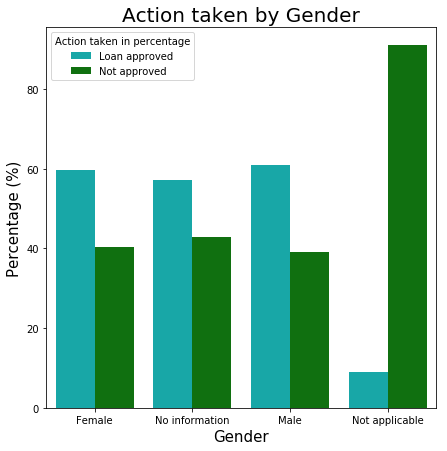

In [149]:
ax1 = sns.barplot(x='applicant_sex_name', y= 'percent', data=gg_gender_app , hue ='Action taken in percentage' )

plt.xticks(fontsize=10)
plt.xlabel("Gender" ,fontsize=15)
plt.ylabel("Percentage (%)",fontsize=15)
plt.title("Action taken by Gender",fontsize=20)
plt.rcParams['figure.figsize']=(7,7)
plt.rcParams['axes.prop_cycle'] = ("cycler('color', 'cg')")
#plt.xticks(rotation=75)

C:\Users\jyoti\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

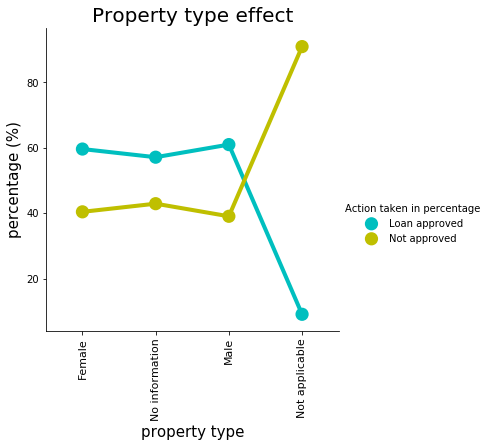

In [132]:
sns.factorplot(x='applicant_sex_name', y= 'percent', data=gg_gender_app, hue ='Action taken in percentage' , style ='Approved_or_NotApproved_in_Percent',scale = 1.5)
plt.xticks(fontsize=11)
plt.xlabel("property type" ,fontsize=15)
plt.ylabel("percentage (%)",fontsize=15)
plt.title("Property type effect",fontsize=20)
plt.rcParams['figure.figsize']=(10,10)
plt.xticks(rotation=90)


In [ ]:
#ethinicity

In [83]:
ethnicity = filtered_loan[['applicant_ethnicity_name','approvedornot']]
ethnicity.head()
ethnicity_app = filtered_loan.groupby(["applicant_ethnicity_name","approvedornot" ]).size().reset_index()
ethnicity_app

,applicant_ethnicity_name,approvedornot,0
0,Hispanic or Latino,Loan approved,12487
1,Hispanic or Latino,Not approved,10039
2,"Information not provided by applicant in mail,...",Loan approved,34347
3,"Information not provided by applicant in mail,...",Not approved,25692
4,Not Hispanic or Latino,Loan approved,213740
5,Not Hispanic or Latino,Not approved,136037
6,Not applicable,Loan approved,3076
7,Not applicable,Not approved,30533


In [85]:
list4 = ['Hispanic or Latino', 'Information not provided by applicant in mail, Internet, or telephone application', 'Not Hispanic or Latino' , 'Not applicable']
ethnicity_app.applicant_ethnicity_name.unique()

array(['Hispanic or Latino',
       'Information not provided by applicant in mail, Internet, or telephone application',
       'Not Hispanic or Latino', 'Not applicable'], dtype=object)

In [97]:
for i in list4:
    #temp = 0
    if(i == 'Hispanic or Latino'):
        val = ethnicity_app[ethnicity_app['applicant_ethnicity_name']==i][0].sum()
        print(val)
        ethnicity_app.loc[ethnicity_app['applicant_ethnicity_name']==i,'total'] = val
        
        
    if(i == 'Information not provided by applicant in mail, Internet, or telephone application'):
        temp = ethnicity_app[ethnicity_app['applicant_ethnicity_name']==i][0].sum()
        print(temp)
        ethnicity_app.loc[ethnicity_app['applicant_ethnicity_name']==i,'total'] = temp
        
        
    if(i == 'Not Hispanic or Latino'):
        value = ethnicity_app[ethnicity_app['applicant_ethnicity_name']==i][0].sum()
        print(value)
        ethnicity_app.loc[ethnicity_app['applicant_ethnicity_name']==i,'total'] = value
        
    if(i == 'Not applicable'):
        value1 = ethnicity_app[ethnicity_app['applicant_ethnicity_name']==i][0].sum()
        print(value1)
        ethnicity_app.loc[ethnicity_app['applicant_ethnicity_name']==i,'total'] = value1
        
ethnicity_app


gg_ethnicity_app= ethnicity_app.rename(columns= {0: 'value', 'approvedornot': 'Action taken in percentage'})
gg_ethnicity_app['percent']= gg_ethnicity_app['value']/gg_ethnicity_app['total']

gg_ethnicity_app['percent'] *=100

gg_ethnicity_app['applicant_ethnicity_name'] = gg_ethnicity_app['applicant_ethnicity_name'].replace({'Information not provided by applicant in mail, Internet, or telephone application':'No information'})
gg_ethnicity_app

22526
60039
349777
33609


,applicant_ethnicity_name,Action taken in percentage,value,total,percent
0,Hispanic or Latino,Loan approved,12487,22526.0,55.433721
1,Hispanic or Latino,Not approved,10039,22526.0,44.566279
2,No information,Loan approved,34347,60039.0,57.207815
3,No information,Not approved,25692,60039.0,42.792185
4,Not Hispanic or Latino,Loan approved,213740,349777.0,61.107506
5,Not Hispanic or Latino,Not approved,136037,349777.0,38.892494
6,Not applicable,Loan approved,3076,33609.0,9.152310
7,Not applicable,Not approved,30533,33609.0,90.847690


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

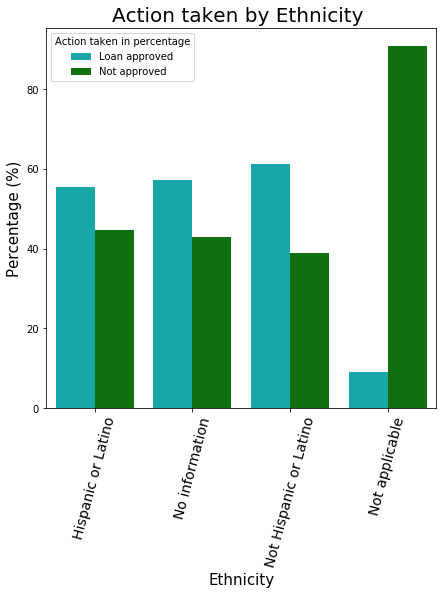

In [143]:
ax1 = sns.barplot(x='applicant_ethnicity_name', y= 'percent', data=gg_ethnicity_app , hue ='Action taken in percentage' )

plt.xticks(fontsize=14)
plt.xlabel("Ethnicity" ,fontsize=15)
plt.ylabel("Percentage (%)",fontsize=15)
plt.title("Action taken by Ethnicity ",fontsize=20)
plt.rcParams['figure.figsize']=(7,7)
plt.rcParams['axes.prop_cycle'] = ("cycler('color', 'cg')")
plt.xticks(rotation=75)

C:\Users\jyoti\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

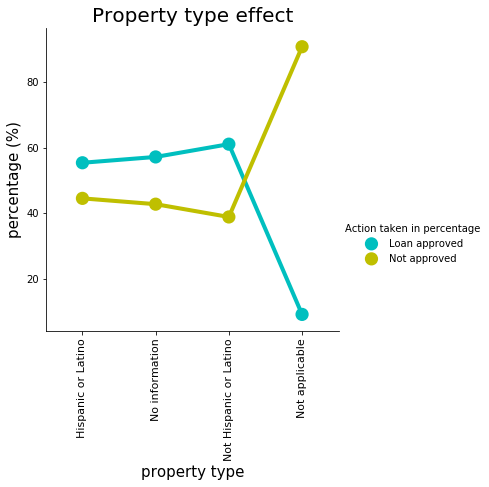

In [131]:
sns.factorplot(x='applicant_ethnicity_name', y= 'percent', data=gg_ethnicity_app, hue ='Action taken in percentage' , style ='Approved_or_NotApproved_in_Percent',scale = 1.5)
plt.xticks(fontsize=11)
plt.xlabel("property type" ,fontsize=15)
plt.ylabel("percentage (%)",fontsize=15)
plt.title("Property type effect",fontsize=20)
plt.rcParams['figure.figsize']=(10,10)
plt.xticks(rotation=90)

In [100]:
##race 

In [101]:
race = filtered_loan[['applicant_race_name_1','approvedornot']]
race.head()
race_app = filtered_loan.groupby(["applicant_race_name_1","approvedornot" ]).size().reset_index()
race_app

,applicant_race_name_1,approvedornot,0
0,American Indian or Alaska Native,Loan approved,2295
1,American Indian or Alaska Native,Not approved,2193
2,Asian,Loan approved,22389
3,Asian,Not approved,14404
4,Black or African American,Loan approved,5641
5,Black or African American,Not approved,5223
6,"Information not provided by applicant in mail,...",Loan approved,35054
7,"Information not provided by applicant in mail,...",Not approved,27131
8,Native Hawaiian or Other Pacific Islander,Loan approved,2010
9,Native Hawaiian or Other Pacific Islander,Not approved,1688


In [111]:
list5 = ['American Indian or Alaska Native', 'Asian', 'Black or African American' , 'Information not provided by applicant in mail, Internet, or telephone application','Native Hawaiian or Other Pacific Islander','Not applicable', 'White']
race_app.applicant_race_name_1.unique()

array(['American Indian or Alaska Native', 'Asian',
       'Black or African American',
       'Information not provided by applicant in mail, Internet, or telephone application',
       'Native Hawaiian or Other Pacific Islander', 'Not applicable',
       'White'], dtype=object)

In [113]:
for i in list5:
    #temp = 0
    if(i == 'American Indian or Alaska Native'):
        val = race_app[race_app['applicant_race_name_1']==i][0].sum()
        print(val)
        race_app.loc[race_app['applicant_race_name_1']==i,'total'] = val
        
        
    if(i == 'Asian'):
        temp = race_app[race_app['applicant_race_name_1']==i][0].sum()
        print(temp)
        race_app.loc[race_app['applicant_race_name_1']==i,'total'] = temp
        
        
    if(i == 'Black or African American'):
        value = race_app[race_app['applicant_race_name_1']==i][0].sum()
        print(value)
        race_app.loc[race_app['applicant_race_name_1']==i,'total'] = value
        
    if(i == 'Information not provided by applicant in mail, Internet, or telephone application'):
        value1 = race_app[race_app['applicant_race_name_1']==i][0].sum()
        print(value1)
        race_app.loc[race_app['applicant_race_name_1']==i,'total'] = value1
        
        
    if(i == 'Native Hawaiian or Other Pacific Islander'):
        val1 = race_app[race_app['applicant_race_name_1']==i][0].sum()
        print(val1)
        race_app.loc[race_app['applicant_race_name_1']==i,'total'] = val1
        
        
    if(i == 'Not applicable'):
        temp1 = race_app[race_app['applicant_race_name_1']==i][0].sum()
        print(temp1)
        race_app.loc[race_app['applicant_race_name_1']==i,'total'] = temp1
        
        
    if(i == 'White'):
        temp2 = race_app[race_app['applicant_race_name_1']==i][0].sum()
        print(temp2)
        race_app.loc[race_app['applicant_race_name_1']==i,'total'] = temp2
        
race_app


gg_race_app= race_app.rename(columns= {0: 'value', 'approvedornot': 'Action taken in percentage'})
gg_race_app['percent']= gg_race_app['value']/gg_race_app['total']

gg_race_app['percent'] *=100

gg_race_app['applicant_race_name_1'] = gg_race_app['applicant_race_name_1'].replace({'Information not provided by applicant in mail, Internet, or telephone application':'No information'})
gg_race_app

4488
36793
10864
62185
3698
33500
314423


,applicant_race_name_1,Action taken in percentage,value,total,percent
0,American Indian or Alaska Native,Loan approved,2295,4488.0,51.136364
1,American Indian or Alaska Native,Not approved,2193,4488.0,48.863636
2,Asian,Loan approved,22389,36793.0,60.851249
3,Asian,Not approved,14404,36793.0,39.148751
4,Black or African American,Loan approved,5641,10864.0,51.923785
5,Black or African American,Not approved,5223,10864.0,48.076215
6,No information,Loan approved,35054,62185.0,56.370507
7,No information,Not approved,27131,62185.0,43.629493
8,Native Hawaiian or Other Pacific Islander,Loan approved,2010,3698.0,54.353705
9,Native Hawaiian or Other Pacific Islander,Not approved,1688,3698.0,45.646295


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

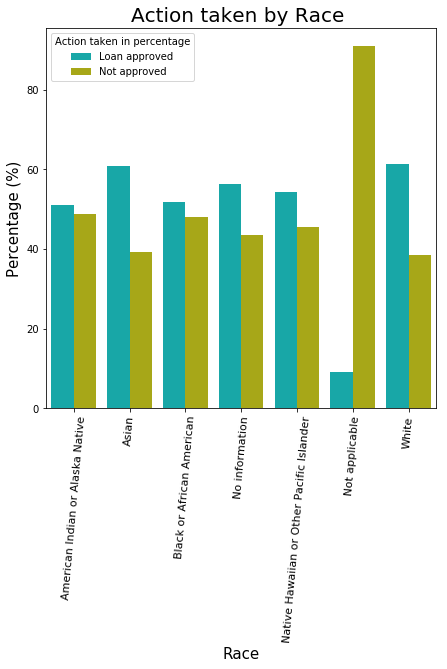

In [140]:
ax1 = sns.barplot(x='applicant_race_name_1', y= 'percent', data=gg_race_app, hue ='Action taken in percentage' )

plt.xticks(fontsize=11)
plt.xlabel("Race" ,fontsize=15)
plt.ylabel("Percentage (%)",fontsize=15)
plt.title("Action taken by Race ",fontsize=20)
plt.rcParams['figure.figsize']=(7,7)
plt.rcParams['axes.prop_cycle'] = ("cycler('color', 'cy')")
plt.xticks(rotation=85)

C:\Users\jyoti\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

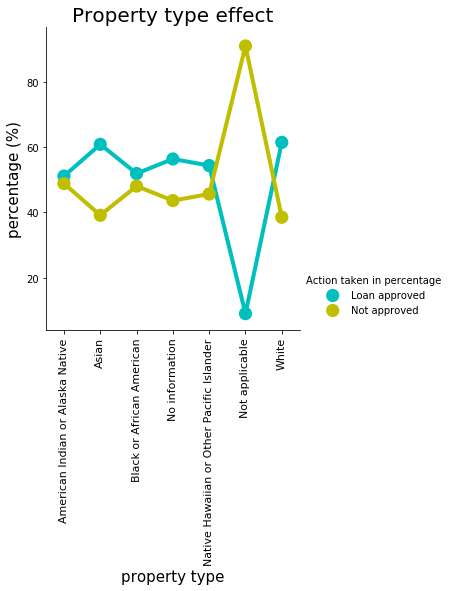

In [130]:
sns.factorplot(x='applicant_race_name_1', y= 'percent', data=gg_race_app, hue ='Action taken in percentage' , style ='Approved_or_NotApproved_in_Percent',scale = 1.5)
plt.xticks(fontsize=11)
plt.xlabel("property type" ,fontsize=15)
plt.ylabel("percentage (%)",fontsize=15)
plt.title("Property type effect",fontsize=20)
plt.rcParams['figure.figsize']=(10,15)
plt.xticks(rotation=90)

In [9]:
msamd = data[['tract_to_msamd_income', 'applicant_income_000s' , 'msamd_name' , 'action_taken_name']]
s = msamd.dropna(how='any')
s['action taken'] = filtered_loan['action_taken_name'].apply(lambda x:'Loan approved' if x == 'Loan originated' else 'Not approved')

s.head()

C:\Users\jyoti\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tract_to_msamd_income,applicant_income_000s,msamd_name,action_taken_name,action taken
0,121.690002,116.0,"Portland, Vancouver, Hillsboro - OR, WA",Loan originated,Loan approved
1,83.370003,42.0,Walla Walla - WA,Loan originated,Loan approved
2,91.129997,117.0,"Portland, Vancouver, Hillsboro - OR, WA",Loan originated,Loan approved
3,146.169998,315.0,"Portland, Vancouver, Hillsboro - OR, WA",Loan originated,Loan approved
4,162.470001,114.0,"Bremerton, Silverdale - WA",Loan originated,Loan approved


In [10]:
f = s.groupby(["msamd_name"]).mean()
msamdapproved = s[s['action taken'] == 'Loan approved']
msamdapproved.head()
qw = msamdapproved.groupby(["msamd_name"]).mean().reset_index()
app_msamd = qw.rename(columns = {'applicant_income_000s':' approved applicant_income_000s'})
app_msamd

hdsj= s.groupby(["msamd_name", "action taken"]).mean()
hdsj


tract_to_msamd_income  \
msamd_name                              action taken                           
Bellingham - WA                         Loan approved             102.490839   
                                        Not approved              102.079668   
Bremerton, Silverdale - WA              Loan approved             107.566030   
                                        Not approved              106.413125   
Kennewick, Richland - WA                Loan approved             117.501820   
                                        Not approved              109.557702   
Lewiston - ID, WA                       Loan approved              98.916195   
                                        Not approved               98.991363   
Longview - WA                           Loan approved             106.128419   
                                        Not approved              106.450768   
Mount Vernon, Anacortes - WA            Loan approved             102.503684   
                                        Not approved              102.355974   
Olympia, Tumwater - WA                  Loan approved             105.665247   
                                        Not approved              105.109382   
Portland, Vancouver, Hillsboro - OR, WA Loan approved             103.774126   
                                        Not approved              102.723739   
Seattle, Bellevue, Everett - WA         Loan approved             109.114502   
                                        Not approved              105.666819   
Spokane, Spokane Valley - WA            Loan approved             110.415263   
                                        Not approved              106.640363   
Tacoma, Lakewood - WA                   Loan approved             108.570112   
                                        Not approved              106.257621   
Walla Walla - WA                        Loan approved             107.116128   
                                        Not approved              105.984220   
Wenatchee - WA                          Loan approved             105.505262   
                                        Not approved              103.823926   
Yakima - WA                             Loan approved             120.817987   
                                        Not approved              111.617999   

                                                       applicant_income_000s  
msamd_name                              action taken                          
Bellingham - WA                         Loan approved             104.931732  
                                        Not approved               98.695187  
Bremerton, Silverdale - WA              Loan approved             107.970351  
                                        Not approved              102.854531  
Kennewick, Richland - WA                Loan approved              90.373843  
                                        Not approved               80.844198  
Lewiston - ID, WA                       Loan approved              79.927239  
                                        Not approved               70.843188  
Longview - WA                           Loan approved              83.382864  
                                        Not approved               76.688499  
Mount Vernon, Anacortes - WA            Loan approved              97.171796  
                                        Not approved               92.491304  
Olympia, Tumwater - WA                  Loan approved              96.037355  
                                        Not approved               93.255685  
Portland, Vancouver, Hillsboro - OR, WA Loan approved              99.110894  
                                        Not approved               98.072649  
Seattle, Bellevue, Everett - WA         Loan approved             139.443232  
                                        Not approved              130.656339  
Spokane, Spokane Valley - WA            Loan approved              88.2991

In [11]:
msamdapproved1 = s[s['action taken'] == 'Not approved']
msamdapproved1.head()
qw1 = msamdapproved1.groupby(["msamd_name"]).mean().reset_index()
not_app_app = qw1.rename(columns = {'applicant_income_000s':' Not approved applicant_income_000s'})

Not_approved_msamd = not_app_app.drop('tract_to_msamd_income', axis=1)
Not_approved_msamd

,msamd_name,Not approved applicant_income_000s
0,Bellingham - WA,98.695187
1,"Bremerton, Silverdale - WA",102.854531
2,"Kennewick, Richland - WA",80.844198
3,"Lewiston - ID, WA",70.843188
4,Longview - WA,76.688499
5,"Mount Vernon, Anacortes - WA",92.491304
6,"Olympia, Tumwater - WA",93.255685
7,"Portland, Vancouver, Hillsboro - OR, WA",98.072649
8,"Seattle, Bellevue, Everett - WA",130.656339
9,"Spokane, Spokane Valley - WA",83.602548


In [12]:
app_app1 = app_msamd.append(Not_approved_msamd)
final_msamd=app_app1.groupby(['msamd_name']).mean().reset_index()
final_msamd

C:\Users\jyoti\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,msamd_name,Not approved applicant_income_000s,approved applicant_income_000s,tract_to_msamd_income
0,Bellingham - WA,98.695187,104.931732,102.490839
1,"Bremerton, Silverdale - WA",102.854531,107.970351,107.566030
2,"Kennewick, Richland - WA",80.844198,90.373843,117.501820
3,"Lewiston - ID, WA",70.843188,79.927239,98.916195
4,Longview - WA,76.688499,83.382864,106.128419
5,"Mount Vernon, Anacortes - WA",92.491304,97.171796,102.503684
6,"Olympia, Tumwater - WA",93.255685,96.037355,105.665247
7,"Portland, Vancouver, Hillsboro - OR, WA",98.072649,99.110894,103.774126
8,"Seattle, Bellevue, Everett - WA",130.656339,139.443232,109.114502
9,"Spokane, Spokane Valley - WA",83.602548,88.299186,110.415263


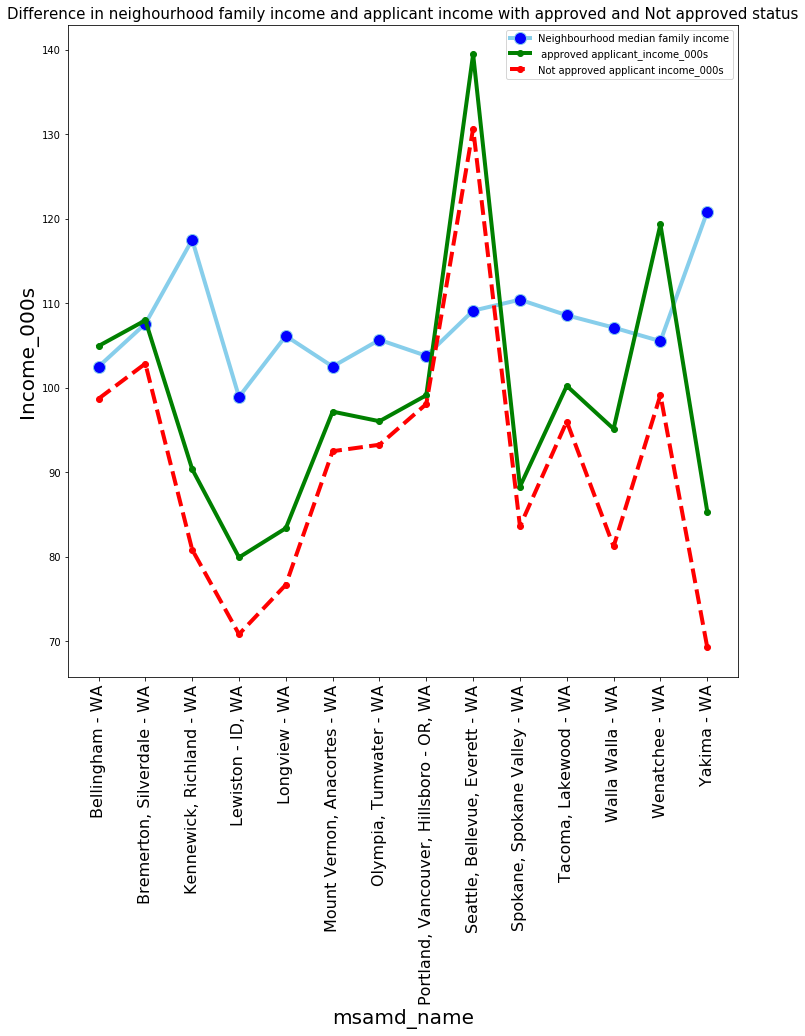

In [14]:
plt.plot( 'msamd_name', 'tract_to_msamd_income', data=final_msamd, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label='Neighbourhood median family income')
plt.plot( 'msamd_name', ' approved applicant_income_000s', data=final_msamd, marker='o', color='green', linewidth=4)
plt.plot( 'msamd_name', ' Not approved applicant_income_000s', data=final_msamd, marker='o', color='red', linewidth=4, linestyle='dashed', label="Not approved applicant income_000s")
plt.rcParams['figure.figsize']=(15,15)
plt.xticks(rotation=90 ,fontsize=16)
plt.xlabel("msamd_name" ,fontsize=20)
plt.ylabel("Income_000s",fontsize=20)
plt.title("Difference in neighourhood family income and applicant income with approved and Not approved status",fontsize=15)
#plt.rcParams['figure.figsize']=(9,9)
plt.legend()

In [15]:
# Now lets find out the main reasons of loan rejections.
denial = data[['denial_reason_name_1', 'action_taken_name']]
denial1= denial.dropna(how='any')
denial_reason = denial1.groupby(['denial_reason_name_1']).size().reset_index()
denial_reason1= denial_reason.sort_values(by = 0)
denial_reason1

,denial_reason_name_1,0
6,Mortgage insurance denied,17
4,Employment history,535
5,"Insufficient cash (downpayment, closing costs)",1036
8,Unverifiable information,1353
7,Other,4058
1,Credit application incomplete,5433
0,Collateral,5748
2,Credit history,7671
3,Debt-to-income ratio,8648


In [16]:
df= ['Mortgage insurance denied','Employment history','Unverifiable information']
df1=[17,535,1036,1353]

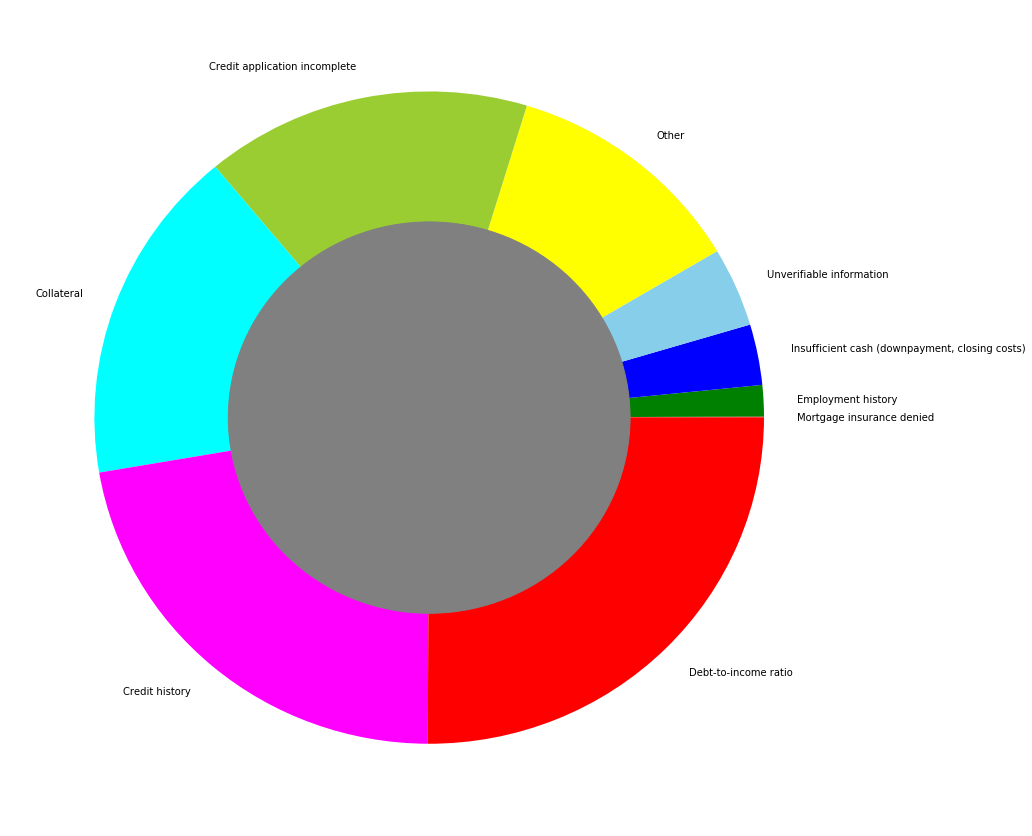

In [17]:
# create data

df1 = denial_reason1['denial_reason_name_1']

df = denial_reason1[0]
# Create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.6, color='gray')
# Give color names
plt.pie(df, labels=df1, colors=['red','green','blue','skyblue','yellow','yellowgreen','cyan','magenta'])
p=plt.gcf()
p.gca().add_artist(my_circle)
#plt.title("Main denial reason",fontsize=20)
#plt.legend(df1, df, loc='left center', bbox_to_anchor=(-0.1, 1.),  fontsize=8)
plt.show()

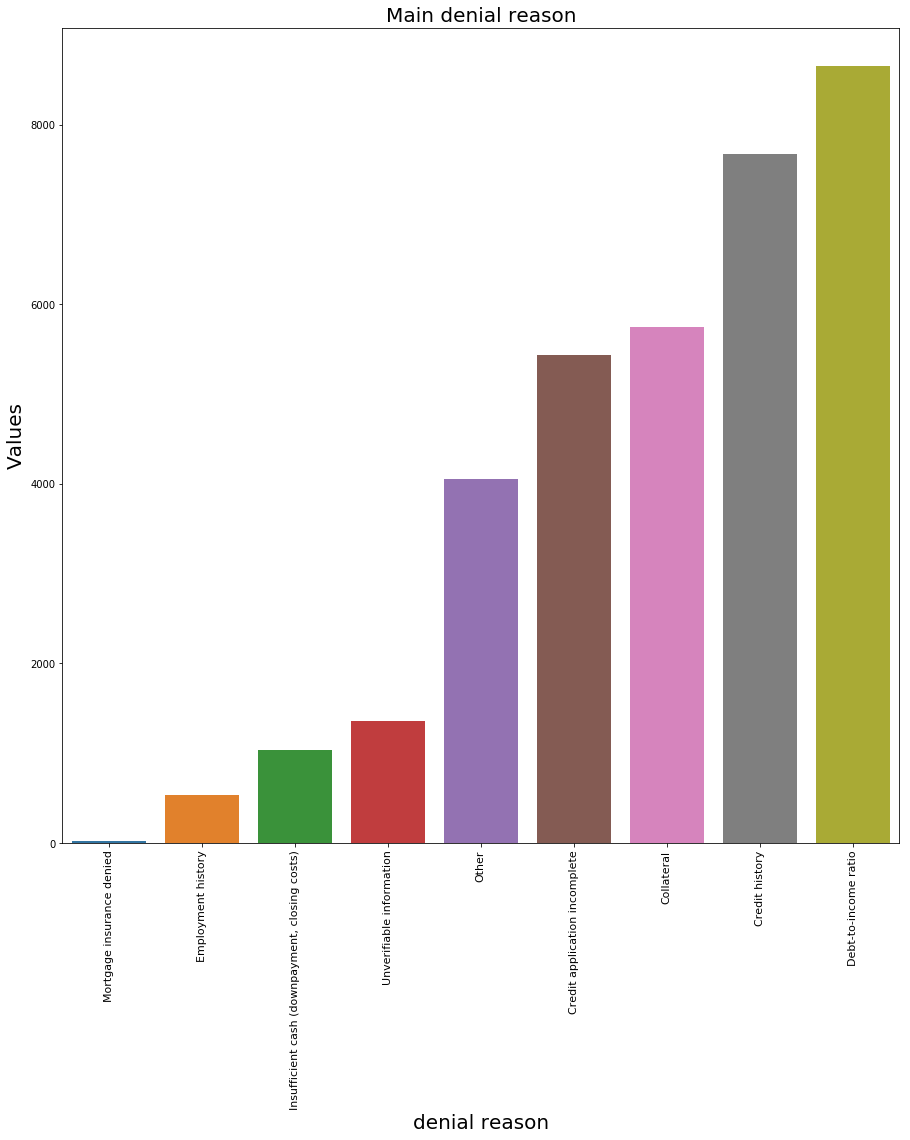

In [18]:
g = sns.barplot(x= 'denial_reason_name_1', y=0 , data= denial_reason1 )
plt.xticks(rotation=90 ,fontsize=11)
plt.xlabel("denial reason" ,fontsize=20)
plt.ylabel("Values",fontsize=20)
plt.title("Main denial reason",fontsize=20)
plt.rcParams['figure.figsize']=(6,6)

In [19]:
#########Map

In [120]:
import numpy as np
 
import pandas as pd
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.figure_factory._county_choropleth import create_choropleth

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import pandas as pd 



In [121]:
df = pd.read_csv('Washington_State_HDMA-2016.csv')
df.head()
df.isnull().sum()


C:\Users\jyoti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (23,24,25,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.



tract_to_msamd_income                615
rate_spread                       457928
population                           610
minority_population                  610
number_of_owner_occupied_units       622
number_of_1_to_4_family_units        611
loan_amount_000s                       0
hud_median_family_income             606
applicant_income_000s              62033
state_name                             0
state_abbr                             0
sequence_number                        0
respondent_id                          0
purchaser_type_name                    0
property_type_name                     0
preapproval_name                       0
owner_occupancy_name                   0
msamd_name                         38274
loan_type_name                         0
loan_purpose_name                      0
lien_status_name                       0
hoepa_status_name                      0
edit_status_name                  392061
denial_reason_name_3              465320
denial_reason_na

In [123]:
fips = pd.read_excel('geocodes.xlsx', converters={'County Code (FIPS)': '{:0>3}'.format})
fips.head()

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
0,10,0,000,0,0,0,United States
1,40,1,000,0,0,0,Alabama
2,50,1,001,0,0,0,Autauga County
3,50,1,003,0,0,0,Baldwin County
4,50,1,005,0,0,0,Barbour County


In [124]:
fips=fips[fips["State Code (FIPS)"]==53] # 53 is washington state code
fips.head()

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
40536,40,53,000,0,0,0,Washington
40537,50,53,001,0,0,0,Adams County
40538,50,53,003,0,0,0,Asotin County
40539,50,53,005,0,0,0,Benton County
40540,50,53,007,0,0,0,Chelan County


In [125]:
fips['county_code']=fips['State Code (FIPS)'].astype(str).str.cat(fips['County Code (FIPS)'].astype(str))
fips.head()

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),county_code
40536,40,53,000,0,0,0,Washington,53000
40537,50,53,001,0,0,0,Adams County,53001
40538,50,53,003,0,0,0,Asotin County,53003
40539,50,53,005,0,0,0,Benton County,53005
40540,50,53,007,0,0,0,Chelan County,53007


In [126]:
fips=fips.drop(labels=['Summary Level','State Code (FIPS)','County Code (FIPS)','County Subdivision Code (FIPS)','Place Code (FIPS)','Consolidtated City Code (FIPS)'],axis=1)
fips.head()

,Area Name (including legal/statistical area description),county_code
40536,Washington,53000
40537,Adams County,53001
40538,Asotin County,53003
40539,Benton County,53005
40540,Chelan County,53007


In [127]:
fips.columns=['county_name','county_code']
fips.head()

,county_name,county_code
40536,Washington,53000
40537,Adams County,53001
40538,Asotin County,53003
40539,Benton County,53005
40540,Chelan County,53007


In [128]:
df=df[df['action_taken_name']!="Application withdrawn by applicant"]
df=df[df['action_taken_name']!='Loan purchased by the institution']
df.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [129]:
df=pd.merge(df,fips,how="left",on="county_name",sort=False)
df.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name,county_code
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated,53011
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,53071
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,53011
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated,53011
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated,53035


In [130]:
county1=pd.DataFrame(df['county_code'].value_counts()).reset_index()
county1.head()

,index,county_code
0,53033,107404
1,53053,45833
2,53061,45172
3,53011,28885
4,53063,21932


In [131]:
county1.columns=['code','loans']
county1.head()

,code,loans
0,53033,107404
1,53053,45833
2,53061,45172
3,53011,28885
4,53063,21932


In [116]:
f=county1['code'].tolist()
v=county1['loans'].tolist()

colorscale = ["#cce6f4","#3697dd","#0a6671","#fdb642","#67a989","#acc5a6","#e0e1d2",
              "#f0dbce","#e4ae98","#d47c6f","#bb4f61","#952b5f","#651656","#330d35"] 

fig = ff.create_choropleth(
    fips=f, values=v, scope=['Washington'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Number of Loans by county',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.2}, exponent_format=False
)
iplot(fig, filename='loans_washington')

C:\Users\jyoti\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


